Importando biblotecas para extração e manipulação dos dados

In [292]:
import pandas as pd

- Importando os dados

In [293]:
df = pd.read_csv('./DB_Teste.csv', sep=';')

In [294]:
df

,Cliente,ID,Tipo,Data da Venda,Categoria,Vendedor,Regional,Duração do Contrato (Meses),Equipe,Valor,Unnamed: 10
0,Cliente 1,2017-0022,Serviços,02/01/2018,Novo Logo,Vendedor 1,Brasil,1,Time 1,"R$ 24.800,00",NaN
1,Cliente 10,2018-0088,Serviços,14/02/2018,Novo Logo,Vendedor 1,Brasil,6,Time 1,"R$ 302.720,00",NaN
2,Cliente 10,2018-0104,Serviços,13/03/2018,Upselling,Vendedor 1,Brasil,1,Time 1,"R$ 51.894,86",NaN
3,Cliente 10,2018-0168,Serviços,30/04/2018,Upselling,Vendedor 1,Brasil,2,Time 1,"R$ 51.894,86",NaN
4,Cliente 10,2018-0169,Serviços,30/04/2018,Upselling,Vendedor 1,Brasil,2,Time 1,"R$ 51.894,86",NaN
...,...,...,...,...,...,...,...,...,...,...,...
848,Cliente 96,2020-2928,Serviços,30/10/2020,Cross selling,Vendedor 1,Brasil,14,Time 1,"R$ 273.000,00",NaN
849,Cliente 96,2021-3613,Produtos,15/03/2021,Upselling,Vendedor 13,Brasil,24,Time 3,"R$ 120.964,32",NaN
850,Cliente 97,2020-2164,Produtos,07/05/2020,Novo Logo,Vendedor 19,Brasil,39,Time 3,"R$ 281.880,00",NaN
851,Cliente 98,2020-2285,Produtos,11/05/2020,Novo Logo,Vendedor 19,Brasil,12,Time 3,"R$ 720.000,00",NaN


Trametamento dos dados

In [295]:
df.drop('Unnamed: 10', axis=1, inplace=True)

In [296]:
# Verificando se existe valores nulos
df.isnull().sum()

Cliente                        0
ID                             0
Tipo                           0
Data da Venda                  0
Categoria                      0
Vendedor                       0
Regional                       0
Duração do Contrato (Meses)    0
Equipe                         0
Valor                          0
dtype: int64

In [297]:
# Verificando se existe valores duplicados
df.duplicated().sum()

0

In [298]:
# Informações sobre os dados (valores nulos e type)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853 entries, 0 to 852
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Cliente                      853 non-null    object
 1   ID                           853 non-null    object
 2   Tipo                         853 non-null    object
 3   Data da Venda                853 non-null    object
 4   Categoria                    853 non-null    object
 5   Vendedor                     853 non-null    object
 6   Regional                     853 non-null    object
 7   Duração do Contrato (Meses)  853 non-null    int64 
 8   Equipe                       853 non-null    object
 9   Valor                        853 non-null    object
dtypes: int64(1), object(9)
memory usage: 66.8+ KB


In [299]:
# Convertendo os dados da coluna "Data da Venda" para manipulação
df['Data da Venda'] =  pd.to_datetime(df['Data da Venda'], format='%d/%m/%Y')

In [300]:
# Convertendo os dados da coluna "Valor" para manipulação em float
df['Valor']=df['Valor'].str.replace('R\$|\.','', regex=True).replace(",", ".", regex=True).astype(float)

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853 entries, 0 to 852
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Cliente                      853 non-null    object        
 1   ID                           853 non-null    object        
 2   Tipo                         853 non-null    object        
 3   Data da Venda                853 non-null    datetime64[ns]
 4   Categoria                    853 non-null    object        
 5   Vendedor                     853 non-null    object        
 6   Regional                     853 non-null    object        
 7   Duração do Contrato (Meses)  853 non-null    int64         
 8   Equipe                       853 non-null    object        
 9   Valor                        853 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 66.8+ KB


Analisando os dados

In [302]:
# Agrupando todos os vendedores e a soma de todas suas respectivas vendas
valor_v = df.groupby(['Vendedor'])['Valor'].sum().reset_index()

In [303]:
# Ordenando do maior para o menor
valor_v.sort_values(by='Valor', ascending=False)

,Vendedor,Valor
22,Vendedor 3,1.662205e+08
27,Vendedor 7,5.779918e+07
1,Vendedor 10,5.221206e+07
28,Vendedor 8,4.727451e+07
0,Vendedor 1,3.092948e+07
29,Vendedor 9,2.637456e+07
4,Vendedor 13,2.483730e+07
9,Vendedor 18,2.266230e+07
21,Vendedor 29,1.907687e+07
24,Vendedor 4,1.734682e+07


In [304]:
# Verificando venda com maior valor
df[df['Valor'] == df['Valor'].max()]

,Cliente,ID,Tipo,Data da Venda,Categoria,Vendedor,Regional,Duração do Contrato (Meses),Equipe,Valor
810,Cliente 89,2020-2073,Produtos,2020-01-31,Novo Logo,Vendedor 7,USA,37,Time 5,24970500.0


In [305]:
# Verificando venda com menor valor
df[df['Valor'] == df['Valor'].min()]

,Cliente,ID,Tipo,Data da Venda,Categoria,Vendedor,Regional,Duração do Contrato (Meses),Equipe,Valor
86,Cliente 120,2020-3124,Produtos,2020-10-01,Upselling,Vendedor 17,Brasil,24,Time 8,1250.0


In [306]:
# Media dos dados de acordo com o tipo da venda
df.groupby('Tipo')['Valor'].mean().reset_index()

,Tipo,Valor
0,Licenciamento,983448.768963
1,Produtos,893409.190065
2,Serviços,314567.937298


In [307]:
# Verificando os total de vendas a determinados clientes
df['Cliente'].value_counts()

Cliente 5      128
Cliente 8       61
Cliente 4       60
Cliente 10      43
Cliente 3       31
              ... 
Cliente 146      1
Cliente 144      1
Cliente 143      1
Cliente 142      1
Cliente 99       1
Name: Cliente, Length: 157, dtype: int64

In [308]:
# Exportando dados tratados
df.to_csv('./DB_Atualizado.csv')

- Plote de um gráfico com os dados dos resultados do trimestralmente

In [309]:
import matplotlib.pyplot as plt

In [310]:
df_sql = pd.read_csv('./trimestral.csv')

In [311]:
df_sql

,QUARTER(Data_da_Venda),YEAR(Data_da_Venda),SUM(Valor)
0,1,2018,9214708.51
1,2,2018,24329411.79
2,3,2018,17807820.99
3,4,2018,28684705.77
4,1,2019,14924051.07
5,2,2019,48639438.83
6,3,2019,35105020.45
7,4,2019,41333096.43
8,1,2020,72307629.80
9,2,2020,49069698.10


In [313]:
# Alterando o type das colunas 'YEAR(Data_da_Venda)', 'QUARTER(Data_da_Venda)' e juntando elas em uma só pra melhor compreensão.
df_sql['Ano_Trimestre'] = df_sql[['YEAR(Data_da_Venda)', 'QUARTER(Data_da_Venda)']].astype(str).apply('.'.join, axis=1)

In [316]:
df_sql

,QUARTER(Data_da_Venda),YEAR(Data_da_Venda),SUM(Valor),Ano_Trimestre
0,1,2018,9214708.51,2018.1
1,2,2018,24329411.79,2018.2
2,3,2018,17807820.99,2018.3
3,4,2018,28684705.77,2018.4
4,1,2019,14924051.07,2019.1
5,2,2019,48639438.83,2019.2
6,3,2019,35105020.45,2019.3
7,4,2019,41333096.43,2019.4
8,1,2020,72307629.80,2020.1
9,2,2020,49069698.10,2020.2


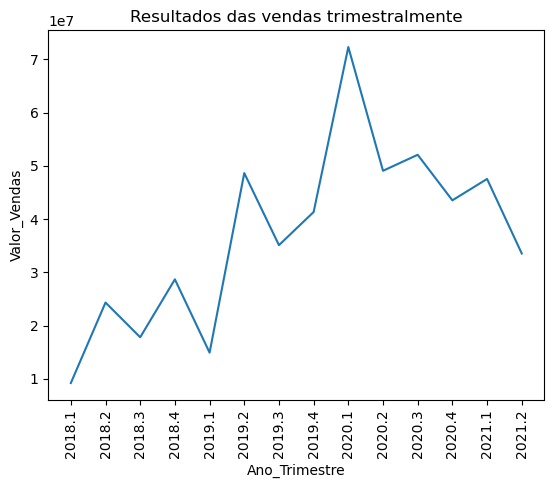

In [320]:
# Crinando um gráfico com os trimestres e total de suas respectivas vendas
plt.plot(df_sql['Ano_Trimestre'], df_sql['SUM(Valor)'])
plt.xticks(rotation = 90)
plt.title('Resultados das vendas trimestralmente')
plt.ylabel('Valor_Vendas')
plt.xlabel('Ano_Trimestre')
plt.show()